In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("USvideos.csv")

In [3]:
df_old = pd.read_csv("USvideos.csv")

In [4]:
df_n = df.fillna({"description":df["title"]})
df = df_n

In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922)
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Nevada,39.876019,-117.224121,POINT (-117.224121 39.876019)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Michigan,44.182205,-84.506836,POINT (-84.50683600000001 44.182205)


In [6]:


max_ = df["likes"].quantile() * 0.75
min_ = df["likes"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["likes"] > max_ + 1.5 * (max_ - min_), "likes"] = max_q
df.loc[df["likes"] < min_ - 1.5 * (max_ - min_), "likes"] = min_q

max_ = df["category_id"].quantile() * 0.75
min_ = df["category_id"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["category_id"] > max_ + 1.5 * (max_ - min_), "category_id"] = max_q
df.loc[df["category_id"] < min_ - 1.5 * (max_ - min_), "category_id"] = min_q

max_ = df["dislikes"].quantile() * 0.75
min_ = df["dislikes"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["dislikes"] > max_ + 1.5 * (max_ - min_), "dislikes"] = max_q
df.loc[df["dislikes"] < min_ - 1.5 * (max_ - min_), "dislikes"] = min_q

max_ = df["comment_count"].quantile() * 0.75
min_ = df["comment_count"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["comment_count"] > max_ + 1.5 * (max_ - min_), "comment_count"] = max_q
df.loc[df["comment_count"] < min_ - 1.5 * (max_ - min_), "comment_count"] = min_q

max_ = df["views"].quantile() * 0.75
min_ = df["views"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["views"] > max_ + 1.5 * (max_ - min_), "views"] = max_q
df.loc[df["views"] < min_ - 1.5 * (max_ - min_), "views"] = min_q

max_ = df["lon"].quantile() * 0.75
min_ = df["lon"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["lon"] > max_ + 1.5 * (max_ - min_), "lon"] = max_q
df.loc[df["lon"] < min_ - 1.5 * (max_ - min_), "lon"] = min_q

max_ = df["lat"].quantile() * 0.75
min_ = df["lat"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["lat"] > max_ + 1.5 * (max_ - min_), "lat"] = max_q
df.loc[df["lat"] < min_ - 1.5 * (max_ - min_), "lat"] = min_q


C:\Users\Mauricio\AppData\Local\Temp\ipykernel_242788\3466656681.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27136.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["likes"] > max_ + 1.5 * (max_ - min_), "likes"] = max_q
C:\Users\Mauricio\AppData\Local\Temp\ipykernel_242788\3466656681.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '946.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["dislikes"] > max_ + 1.5 * (max_ - min_), "dislikes"] = max_q
C:\Users\Mauricio\AppData\Local\Temp\ipykernel_242788\3466656681.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1022791.5' has dtype incompatible with int64, please explicitly ca

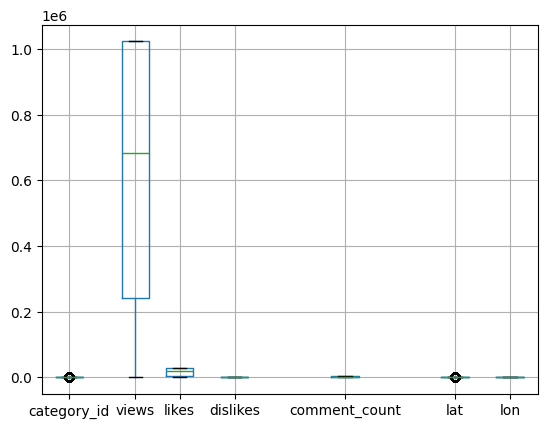

In [7]:
df.boxplot(["category_id","views", "likes", "dislikes", "comment_count", "lat", "lon"], positions=[1, 2.2, 3, 4, 6, 8, 9 ])

plt.subplots_adjust(wspace=10)

<Axes: >

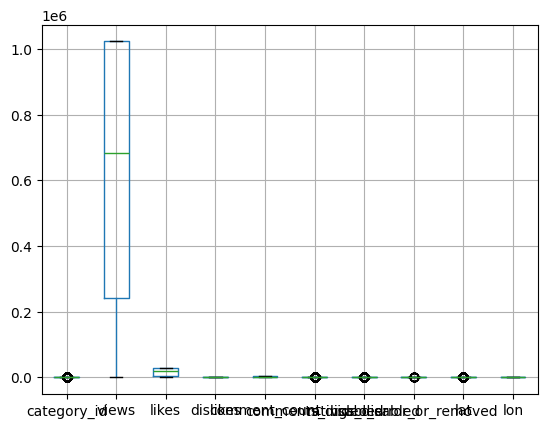

In [8]:
df.boxplot()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40949 non-null  object 
 1   trending_date           40949 non-null  object 
 2   title                   40949 non-null  object 
 3   channel_title           40949 non-null  object 
 4   category_id             40949 non-null  int64  
 5   publish_time            40949 non-null  object 
 6   tags                    40949 non-null  object 
 7   views                   40949 non-null  float64
 8   likes                   40949 non-null  float64
 9   dislikes                40949 non-null  float64
 10  comment_count           40949 non-null  int64  
 11  thumbnail_link          40949 non-null  object 
 12  comments_disabled       40949 non-null  bool   
 13  ratings_disabled        40949 non-null  bool   
 14  video_error_or_removed  40949 non-null

In [10]:
# correlacion entre los likes y el ratio entre likes y dislikes
df["ratio"] = np.where(df['dislikes'] != 0, df['likes'] / df['dislikes'], np.nan)
df_n = df.fillna({"ratio":df["ratio"].median()})
df = df_n
print(df_n["ratio"].corr(df_n["likes"]))

0.07683225186341736


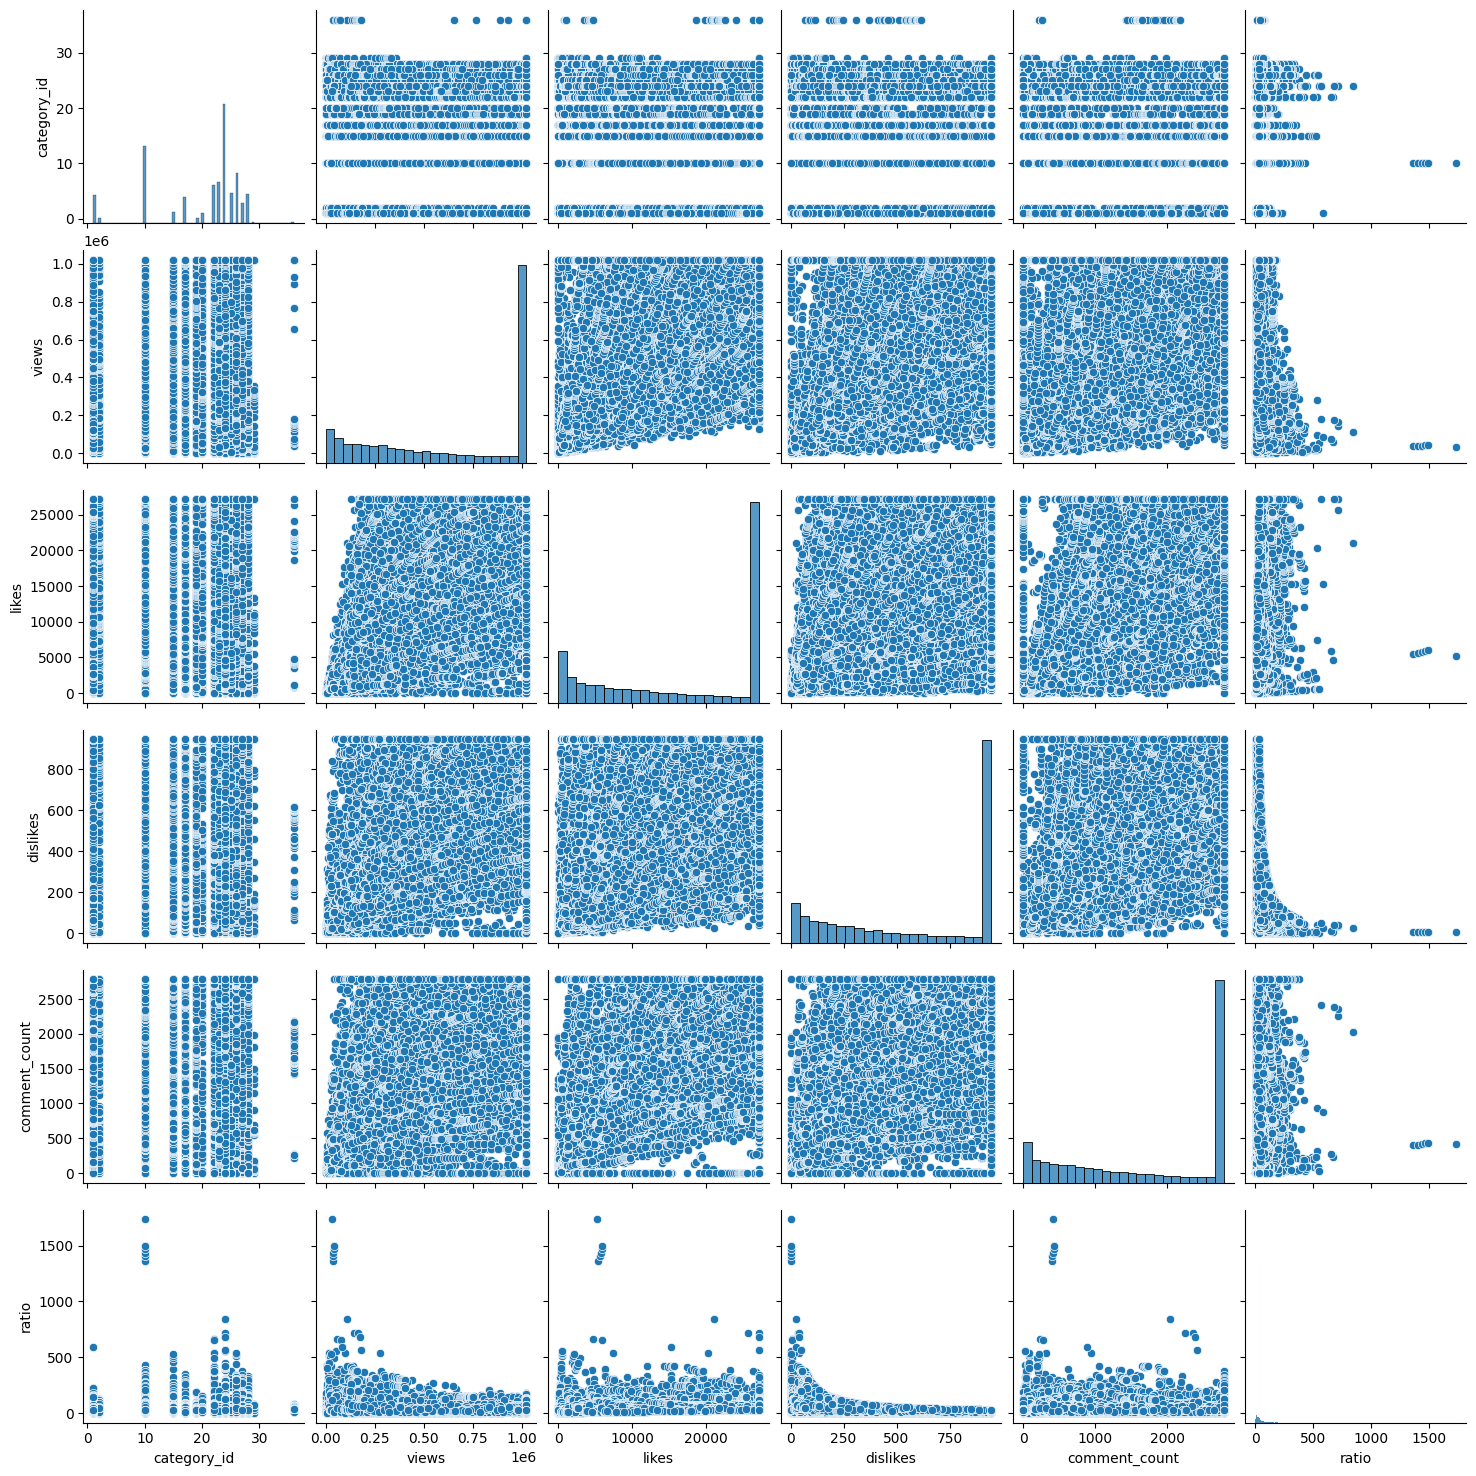

In [11]:
df_ = df[["category_id","views", "likes", "dislikes", "comment_count", "ratio"]]
sns.pairplot(df_)

In [12]:
print(df["views"].corr(df["likes"])) # correlacion fuerte positiva
print(df["comment_count"].corr(df["likes"])) # correlacion fuerte positiva
print(df["dislikes"].corr(df["likes"])) # correlacion fuerte positiva
print(df["lat"].corr(df["likes"])) # no hay correlacion

0.8121757605364103
0.8277934348336276
0.7403153942350117
0.006797990448624868


In [27]:
# correlacion entre los likes y el ratio entre likes y dislikes
df["ratio"] = np.where(df['dislikes'] != 0, df['likes'] / df['dislikes'], np.nan)
df_n = df.fillna({"ratio":df["ratio"].median()})
df = df_n
print(df_n["ratio"].corr(df_n["likes"]))


0.07620059597470315


In [21]:
# correlacion entre los likes y el ratio entre likes y dislikes
df_n["mult"] = df['likes'] * df['dislikes']

print(df_n["mult"].corr(df_n["likes"]))

0.6788759659931053


In [22]:
df_n["mult_comment"] = df['likes'] * df["comment_count"]

print(df_n["mult_comment"].corr(df_n["likes"]))

0.7255214061780436


In [23]:
df_n["mult_views"] = df['views'] * df["comment_count"]

print(df_n["mult_views"].corr(df_n["likes"]))

df_n["ratio_views"] = np.where(df["comment_count"] != 0, df["views"] + df["dislikes"]/ df["comment_count"], np.nan)
df_n = df.fillna({"ratio_views":df["views"]})
df = df_n
print(df_n["ratio_views"].corr(df_n["likes"]))

df_n["sqrt"] = np.sqrt(df_n["views"])
print(df_n["sqrt"].corr(df_n["likes"]))
df_n["sqrt"] = np.sqrt(df_n["comment_count"])
print(df_n["sqrt"].corr(df_n["likes"]))
df_n["sqrt"] = np.sqrt(df_n["dislikes"]) * np.sqrt(df_n["views"])
print(df_n["sqrt"].corr(df_n["likes"]))
df_n["sqrt"] = df_n["dislikes"] * df_n["views"]
print(df_n["sqrt"].corr(df_n["likes"]))

0.6425748683032958
0.6760362876963637
0.7459960180324823
0.7755075221032393
0.7108389073337761
0.6254781603402636


<Axes: >

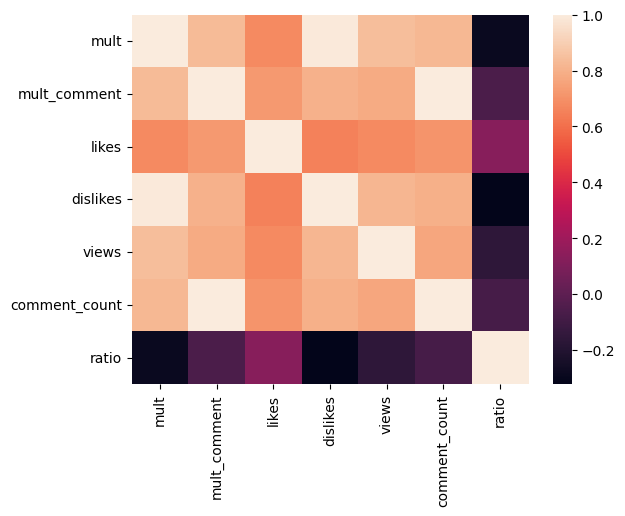

In [24]:
df_a = df_n[["mult", "mult_comment", "likes", "dislikes", "views", "comment_count", "ratio"]]
sns.heatmap(df_a.corr())

<Axes: >

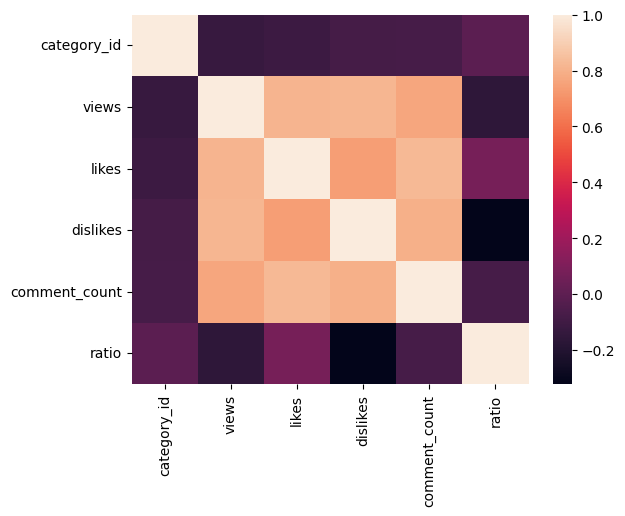

In [32]:
sns.heatmap(df_.corr())

In [ ]:
# CORRÍ ESTO, CORRÍ ESTO
X = df[['views', 'comment_count', 'dislikes']]
y = df['likes']

In [ ]:
# CORRÍ ESTO, CORRÍ ESTO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [13]:
lm = LinearRegression()
lm.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
slope = lm.coef_  # w1
intercept = lm.intercept_ # w0

print("Las pendientes 'w1' del modelo son: ", slope)
print("El término independiente de la recta 'w0' es: ", intercept)

Las pendientes 'w1' del modelo son:  [ 16.38662679   6.96260038 494.52895781]
El término independiente de la recta 'w0' es:  63125.98050715891


In [15]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
likes,16.386627
comment_count,6.962600
dislikes,494.528958


In [25]:
Y_pred = lm.predict(X_test)
Y_pred

NameError: name 'lm' is not defined

In [17]:
df_pred = pd.DataFrame(X_test)
df_pred = df_pred.assign(Likes=y_test)
df_pred = df_pred.assign(Pred = Y_pred.flatten().tolist())
df_pred.head(3)

,likes,comment_count,dislikes,Likes,Pred
8013,3849.0,762,728.0,225941.0,491520.689790
34432,27136.5,2784,946.5,981263.0,995257.216375
27178,12984.0,2784,447.0,413803.0,516328.266325


In [18]:
df_t = df_pred[["Likes", "Pred"]]

df_t["Likes_sqrt"] = np.sqrt(df_pred["Pred"])
df_t["Likes_log"] = np.log(df_pred["Pred"])
df_t["Likes_log10"] = np.log10(df_pred["Pred"])
df_t.head(15)

C:\Users\Mauricio\AppData\Local\Temp\ipykernel_288280\1161713394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["Likes_sqrt"] = np.sqrt(df_pred["Pred"])
C:\Users\Mauricio\AppData\Local\Temp\ipykernel_288280\1161713394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["Likes_log"] = np.log(df_pred["Pred"])


,Likes,Pred,Likes_sqrt,Likes_log,Likes_log10
8013,225941.0,491520.689790,701.085366,13.105259,5.691542
34432,981263.0,995257.216375,997.625790,13.810756,5.997935
27178,413803.0,516328.266325,718.559856,13.154498,5.712926
39195,1022791.5,995257.216375,997.625790,13.810756,5.997935
1742,216658.0,330946.114387,575.279162,12.709711,5.519757
20077,972445.0,990265.031903,995.120612,13.805728,5.995751
32892,1011279.0,995257.216375,997.625790,13.810756,5.997935
38455,1022791.5,995257.216375,997.625790,13.810756,5.997935
4437,241569.0,438385.493978,662.106860,12.990854,5.641856
2141,367227.0,659719.318501,812.231075,13.399570,5.819359


In [19]:
df_pred.shape

(16380, 5)

c:\Users\Mauricio\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


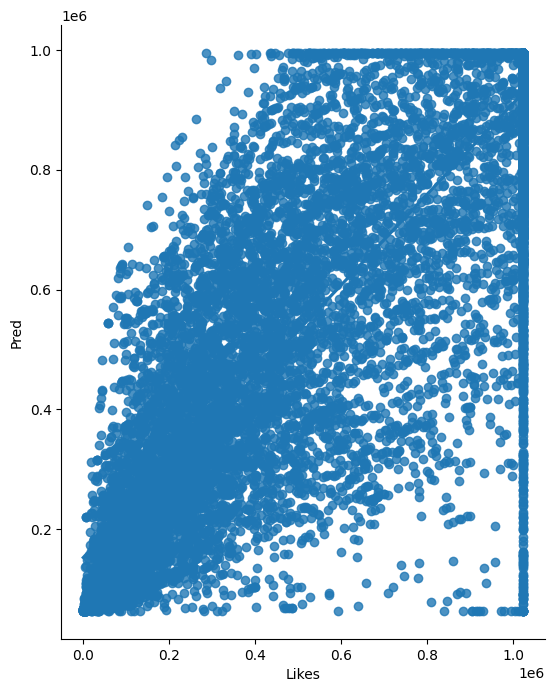

In [20]:
sns.pairplot(df_pred, x_vars=['Likes'], y_vars='Pred', size=7, aspect=0.8,kind = 'reg')

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

MAE: 127861.36081587287
MSE: 36094323186.37183
RMSE: 189985.06042942384


In [20]:
X = df[['views', 'mult_comment', 'mult', 'comment_count', 'dislikes']]
y = df['likes']

KeyError: "['mult_comment', 'mult'] not in index"

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm = LinearRegression() # Regresión lineal, o un intento de 
lm.fit(X_train,y_train)

coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

NameError: name 'X' is not defined

In [16]:
Y_pred = lm.predict(X_test)
pred2 = pd.DataFrame(X_test)
pred2 = df_pred.assign(Likes=y_test)
pred2 = df_pred.assign(Pred = Y_pred.flatten().tolist())
pred2.head(7)

NameError: name 'lm' is not defined

c:\Users\Mauricio\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


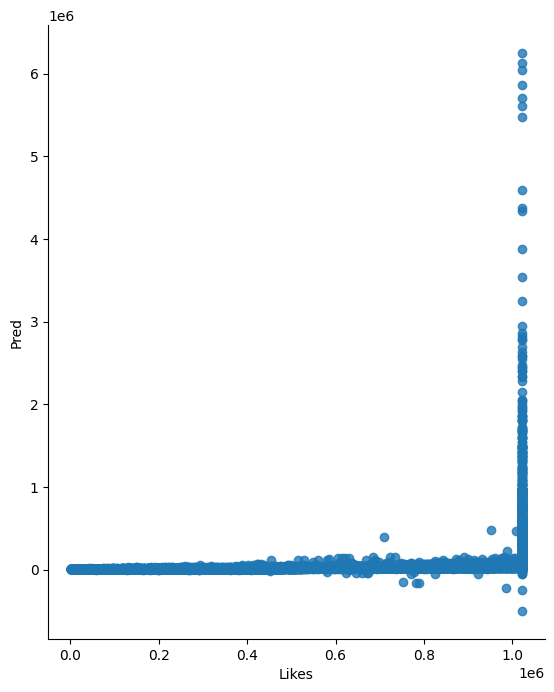

In [37]:
sns.pairplot(pred2, x_vars=['Likes'], y_vars='Pred', size=7, aspect=0.8,kind = 'reg')

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

MAE: 30022.835709452975
MSE: 6563258482.613816
RMSE: 81013.94005116537


In [ ]:
# CORRÍ ESTO, CORRÍ ESTO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
# CORRÍ ESTO, CORRÍ ESTO
X = df[['views', 'comment_count', 'dislikes']]
y = df['likes']
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train, y_train)

Y_pred = regr.predict(X_test)
pred3 = pd.DataFrame(X_test)
pred3 = pred3.assign(Likes=y_test)
pred3 = pred3.assign(Pred = Y_pred.flatten().tolist())
pred3.head(7)

,views,comment_count,dislikes,Likes,Pred
8013,225941.0,762,728.0,8.255828,8.460869
34432,981263.0,2784,946.5,10.208672,10.033650
27178,413803.0,2784,447.0,9.471550,9.974478
39195,1022791.5,2784,946.5,10.208672,10.175336
1742,216658.0,554,159.0,9.333531,8.826742
20077,972445.0,2067,946.5,10.208672,9.847469
32892,1011279.0,2784,946.5,10.208672,10.027587


In [ ]:
# CORRÍ ESTO, CORRÍ ESTO
df[['likes', 'views', 'comment_count', 'dislikes']].corr()
# Evaluando si existe correlación fuerte o débil entra las variables

,likes,views,comment_count,dislikes
likes,1.000000,0.812176,0.827793,0.740315
views,0.812176,1.000000,0.765750,0.815289
comment_count,0.827793,0.765750,1.000000,0.798168
dislikes,0.740315,0.815289,0.798168,1.000000


In [ ]:
# CORRÍ ESTO, CORRÍ ESTO, CORRÍ ESTO, CORRÍ ESTO
# Realizando métrica de error de la última regresión con árboles con metrics
print('MAE:', metrics.mean_absolute_error(y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
# Realizando métrica de error de la última regresión con árboles con metrics
# Imprimir valores reales
print(y_test.head(10).values)
print(Y_pred[:10])

MAE: 0.3412413096244741
MSE: 0.27967615771032434
RMSE: 0.5288441714818499
[ 8.25582843 10.20867181  9.47155012 10.20867181  9.33353098 10.20867181
 10.20867181 10.20867181  9.26388114 10.20867181]
[ 8.46086886 10.03364981  9.97447847 10.17533635  8.8267415   9.84746899
 10.02758741 10.17533635  9.28595715  9.96334239]


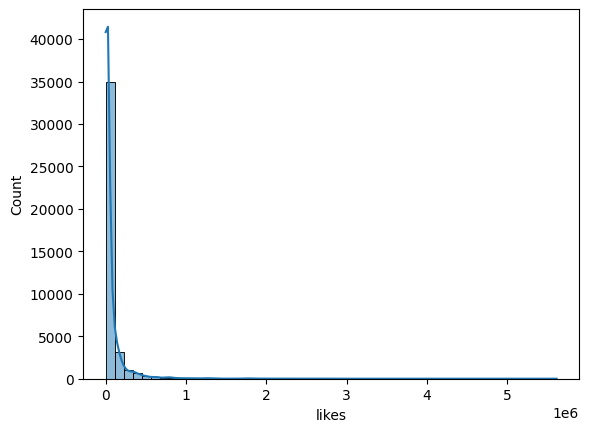

In [48]:
# Probando una distribución de likes
sns.histplot(df["likes"], kde=True, bins=50)
plt.show()

In [ ]:
error_log = metrics.mean_squared_error(y_test, Y_pred, squared=False)
#  CREO QUE NO SIRVE

NameError: name 'y_test' is not defined

In [ ]:
# Al notar una distribución sesgada, muy derechosa para mi gusto, transformamos la variable objeto a log1p
df["likes"] = np.log1p(df["likes"])
likes_pred = np.expm1(Y_pred)
# NO ME SIRVIÓ EN NADA

NameError: name 'Y_pred' is not defined

In [49]:
# Al haber una gran distribución desigual, se aplicará una transformación
df["likes"] = np.log(df["likes"] + 1)  # Se agrega 1 para evitar log(0)
np.expm1(df["likes"])  # Inversa de logaritmo natural

0         57527.0
1         97185.0
2        146033.0
3         10172.0
4        132235.0
           ...   
40944     38160.0
40945     60008.0
40946     48068.0
40947    192957.0
40948    357079.0
Name: likes, Length: 40949, dtype: float64

In [44]:
X = df[['views', 'comment_count', 'dislikes']]
y = df['likes']
regr = RandomForestRegressor(n_estimators= 500,max_depth=2, random_state=0)
regr.fit(X_train, y_train)


Y_pred = regr.predict(X_test)
pred3 = pd.DataFrame(X_test)
pred3 = pred3.assign(Likes=y_test)
pred3 = pred3.assign(Pred = Y_pred.flatten().tolist())
pred3.head(7)

,likes,comment_count,dislikes,Likes,Pred
8013,3849,762,728,225941,1.405583e+06
34432,29447,5576,4535,981263,1.405583e+06
27178,12984,3815,447,413803,1.405583e+06
39195,91419,9136,20962,3443405,1.419201e+06
1742,11310,554,159,216658,1.405583e+06
20077,37846,2067,1181,972445,1.405583e+06
32892,35814,5750,1149,1011279,1.405583e+06


In [42]:
X = df[['likes', 'comment_count', 'dislikes']]
y = df['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
regr = RandomForestRegressor(n_estimators= 3000,max_depth=4, random_state=101)
regr.fit(X_train, y_train)

Y_pred = regr.predict(X_test)
pred3 = pd.DataFrame(X_test)
pred3 = pred3.assign(Views=y_test)
pred3 = pred3.assign(Pred = Y_pred.flatten().tolist())
pred3.head(7)

,likes,comment_count,dislikes,Views,Pred
8013,3849,762,728,225941,5.904561e+05
34432,29447,5576,4535,981263,2.824477e+06
27178,12984,3815,447,413803,5.849039e+05
39195,91419,9136,20962,3443405,3.117807e+06
1742,11310,554,159,216658,5.844525e+05
20077,37846,2067,1181,972445,1.416128e+06
32892,35814,5750,1149,1011279,9.351897e+05


In [33]:
# Creación de variables category y id en df
# Leemos ela rchivo json
# Realizo una acción suicida: variables category y id después de leer .json
import json
with open('../data/US_category_id.json') as f:
  data = json.load(f)

  # Extraer items
  items = data['items']

  # Crear un dataframe con id y title (categoría)
  df_cat = pd.DataFrame([{
      'id': int(item['id']),
      'category': item['snippet']['title']
  } for item in items if item['snippet']['assignable']])

In [39]:
# Asegurarme de que category_id sea entero
df = df[df['category_id'].notna()]
df['category_id'] = df['category_id'].astype(int)

# Unir category_id al dataframe
df = pd.merge(df, df_cat, left_on='category_id', right_on = 'id', how ='left')

In [40]:
# Revisamos...
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratio,mult,mult_comment,mult_views,ratio_views,sqrt,id_x,category_x,id_y,category_y
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,10.208672,946.5,...,28.670365,9662.507872,28420.942331,2.083473e+09,7.483743e+05,7.083360e+08,22.0,People & Blogs,22.0,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",1022791.5,10.208672,946.5,...,28.670365,9662.507872,28420.942331,2.847452e+09,1.022792e+06,9.680722e+08,24.0,Entertainment,24.0,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",1022791.5,10.208672,946.5,...,28.670365,9662.507872,28420.942331,2.847452e+09,1.022792e+06,9.680722e+08,23.0,Comedy,23.0,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168.0,9.227492,666.0,...,15.273273,6145.509959,19802.198756,7.364385e+08,3.431683e+05,2.285499e+08,24.0,Entertainment,24.0,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",1022791.5,10.208672,946.5,...,28.670365,9662.507872,28420.942331,2.847452e+09,1.022792e+06,9.680722e+08,24.0,Entertainment,24.0,Entertainment


In [43]:
# Lo hicimos: añadimos category y id como variables en df
# Ahora, hagamos groupby con category y views
df.groupby("category_y")["views"].sum().sort_values(ascending=False)

category_y
Entertainment            6.432508e+09
Music                    4.808934e+09
Comedy                   2.442929e+09
Howto & Style            2.309603e+09
People & Blogs           1.913682e+09
Film & Animation         1.691027e+09
Science & Technology     1.428367e+09
Sports                   1.254905e+09
News & Politics          9.633220e+08
Education                8.309196e+08
Gaming                   6.406082e+08
Pets & Animals           4.727124e+08
Travel & Events          2.216769e+08
Autos & Vehicles         1.927707e+08
Nonprofits & Activism    1.493957e+07
Name: views, dtype: float64

In [44]:
# 2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?
# Usando category_id según likes
df.groupby("category_y")["likes"].sum().sort_values(ascending=False)

category_y
Entertainment            90404.426932
Music                    62475.052233
Howto & Style            39086.042417
Comedy                   33122.351258
People & Blogs           29348.130615
Science & Technology     21667.656566
Film & Animation         21378.709808
News & Politics          18286.601682
Sports                   18035.343454
Education                15326.827678
Pets & Animals            8414.900034
Gaming                    7912.721635
Travel & Events           3513.477844
Autos & Vehicles          3014.921200
Nonprofits & Activism      396.685523
Name: likes, dtype: float64

In [45]:
# Ahora, según dislikes
df.groupby("category_y")["dislikes"].sum().sort_values(ascending=False)

category_y
Entertainment            5773260.5
Music                    4387457.0
Comedy                   2320703.0
Howto & Style            2225509.5
People & Blogs           1775921.0
Film & Animation         1469797.0
Science & Technology     1331946.0
News & Politics          1116094.0
Sports                    996723.0
Education                 810592.5
Gaming                    616700.0
Pets & Animals            369126.0
Travel & Events           177184.5
Autos & Vehicles          155460.5
Nonprofits & Activism      15921.5
Name: dislikes, dtype: float64

In [46]:
# 3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta"?
df['like_dislike_ratio'] = np.where(df['dislikes'] != 0, df['likes'] / df['dislikes'], np.nan)

df.groupby('category_y')['like_dislike_ratio'].mean().sort_values(ascending=False)


category_y
Nonprofits & Activism    0.519943
Autos & Vehicles         0.140095
Science & Technology     0.128193
Pets & Animals           0.121050
News & Politics          0.119655
Sports                   0.094495
Film & Animation         0.074433
Travel & Events          0.074174
Education                0.073483
People & Blogs           0.071052
Entertainment            0.067382
Howto & Style            0.061192
Music                    0.055909
Comedy                   0.049324
Gaming                   0.033987
Name: like_dislike_ratio, dtype: float64

In [47]:
# 4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?
df['view_comment_ratio'] = np.where(df['comment_count'] != 0, df['views'] / df['comment_count'], np.nan)
df.groupby('category_y')['view_comment_ratio'].mean().sort_values(ascending=False)

category_y
Autos & Vehicles         2316.913607
Film & Animation          943.117171
Entertainment             843.837865
Travel & Events           773.112850
Sports                    726.807898
Nonprofits & Activism     595.017354
Music                     583.239591
Comedy                    527.933305
News & Politics           486.702504
Pets & Animals            476.027432
People & Blogs            471.557681
Science & Technology      471.122680
Education                 446.336578
Gaming                    384.042923
Howto & Style             369.339438
Name: view_comment_ratio, dtype: float64

In [62]:
# 5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?
# Primero, la variación de los videos con mayor tendencia a lo largo del tiempo
# Examinemos los videos con mayor tendencia a lo largo del tiempo

df['publish_time'] = pd.to_datetime(df['publish_time'])
# Por mes
df['month'] = df['publish_time'].dt.month

views_por_mes = df.groupby('month')['views'].sum().reset_index()


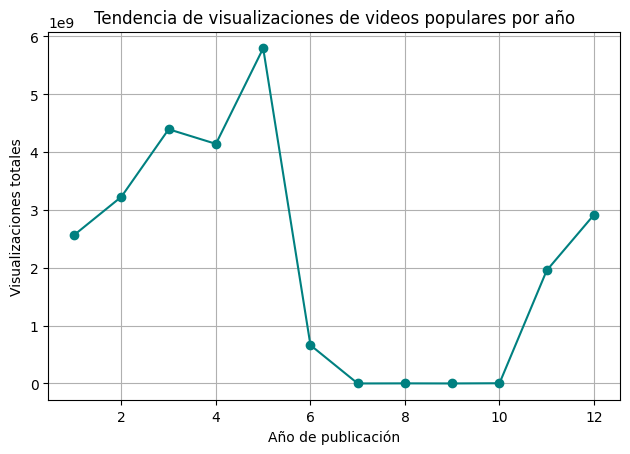

In [63]:
# Ahora, gráfico de lo obtenido en el anterior código
plt.plot(views_por_mes['month'], views_por_mes['views'], marker='o', color='teal')
plt.title('Tendencia de visualizaciones de videos populares por año')
plt.xlabel('Año de publicación')
plt.ylabel('Visualizaciones totales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
# 6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?
df.groupby("channel_title")["views"].sum().sort_values(ascending=False)

channel_title
Screen Junkies                          176893827.0
Saturday Night Live                     160507383.5
TheEllenShow                            148841762.5
jacksfilms                              148828575.5
FBE                                     147837873.5
                                           ...     
CHauserable                                  1807.0
Total Combat                                 1722.0
OjO Commuter Scooter by OjO Electric         1706.0
GoDucksdotcom                                1391.0
90s Commercials                               773.0
Name: views, Length: 2207, dtype: float64

In [49]:
# Con menos frecuencia
df.groupby("channel_title")["views"].sum().sort_values(ascending=True)

channel_title
90s Commercials                               773.0
GoDucksdotcom                                1391.0
OjO Commuter Scooter by OjO Electric         1706.0
Total Combat                                 1722.0
CHauserable                                  1807.0
                                           ...     
FBE                                     147837873.5
jacksfilms                              148828575.5
TheEllenShow                            148841762.5
Saturday Night Live                     160507383.5
Screen Junkies                          176893827.0
Name: views, Length: 2207, dtype: float64

In [50]:
# 7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?

# Con vistas (views), mayor número de vistas
df.groupby("state")["views"].sum().sort_values(ascending=False).head(1)

state
New Hampshire    566635969.5
Name: views, dtype: float64

In [51]:
# Según "Me gusta" (likes)
df.groupby("state")["likes"].sum().sort_values(ascending=False).head(1)

state
North Carolina    8069.676775
Name: likes, dtype: float64

In [52]:
# Según "No me gusta" (dislikes)
df.groupby("state")["dislikes"].sum().sort_values(ascending=False).head(1)
#

state
New Hampshire    516189.0
Name: dislikes, dtype: float64

In [53]:
# Adicionalmente:
# 8. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?
# Supongo que con tendencia se hace referencia indirecta, tácita, sumisa, a la cantidad de vistas (view)
# Primero, revisamos los videos en tendencia (mayor cantidad de vistas) por su id
df.groupby("title")["views"].sum().sort_values(ascending=False)

title
WE MADE OUR MOM CRY...HER DREAM CAME TRUE!                                      30683745.0
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures    29660953.5
The ULTIMATE $30,000 Gaming PC Setup                                            29660953.5
YoungBoy Never Broke Again Goes Sneaker Shopping With Complex                   29660953.5
Why I'm So Scared (being myself and crying too much)                            29660953.5
                                                                                   ...    
How Noah Galvin Makes Evan Hansen His Own                                           1402.0
Coach Taggart Monday Presser Ahead of Arizona                                       1391.0
The Algorithm That Will Keep You Buying On Cyber Monday | Mach | NBC News           1381.0
Huffy Metaloid Bicycle Commercial 1997                                               773.0
Raw: 3 South Carolina Deputies, 1 Officer Shot                                      

In [54]:
# Ahora, revisemos los videos con mayor cantidad de likes
df.groupby("title")["likes"].sum().sort_values(ascending=False)

title
WE MADE OUR MOM CRY...HER DREAM CAME TRUE!                                      306.260154
Why I'm So Scared (being myself and crying too much)                            296.051483
YoungBoy Never Broke Again Goes Sneaker Shopping With Complex                   296.051483
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures    296.051483
Sam Smith - Pray (Official Video) ft. Logic                                     296.051483
                                                                                   ...    
KKW BEAUTY: Conceal, Bake, Brighten with Mario Dedivanovic                        0.000000
Kelly Oubre Punches John Wall in the Lead during warriors wizards scuffle         0.000000
Camila Cabello Performs 'Never Be the Same' | Dancing On Ice 2018                 0.000000
MassMutual “I'll Stand By You” 2018 Commercial                                    0.000000
Camilla Cabello Performs 'Never Be the Same' | Dancing On Ice 2018                0.